<a href="https://colab.research.google.com/github/fowardelcac/credit_card_approval/blob/main/Notebook/Untitled39.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
! git clone https://github.com/fowardelcac/credit_card_approval.git

Cloning into 'credit_card_approval'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 47 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), 7.38 MiB | 1.35 MiB/s, done.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [2]:
def metricas(y_test, y_pred):
  matriz = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  return matriz, accuracy, precision, recall, f1

In [3]:
df = pd.read_csv('/content/credit_card_approval/Notebook/Dataset/synthetic_credit_card_approval.csv')
df.head()

,Num_Children,Group,Income,Own_Car,Own_Housing,Target
0,4,0,36151,0,0,0
1,0,0,36095,1,0,0
2,2,1,62110,1,1,0
3,0,1,73644,1,0,0
4,3,0,99146,0,0,1


In [4]:
scaler = MinMaxScaler()
df[['Num_Children', 'Income']] = scaler.fit_transform(df[['Num_Children', 'Income']])

In [5]:
df.head()

,Num_Children,Group,Income,Own_Car,Own_Housing,Target
0,0.363636,0,0.068345,0,0,0
1,0.000000,0,0.067723,1,0,0
2,0.181818,1,0.356782,1,1,0
3,0.000000,1,0.484939,1,0,0
4,0.272727,0,0.768297,0,0,1


In [6]:
df.Target.value_counts()

0    306687
1    193313
Name: Target, dtype: int64

In [7]:
X = df.drop('Target', axis=1).values.reshape((-1, 5))
y = df.Target

# Tree

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [9]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = tree.predict(X_test)

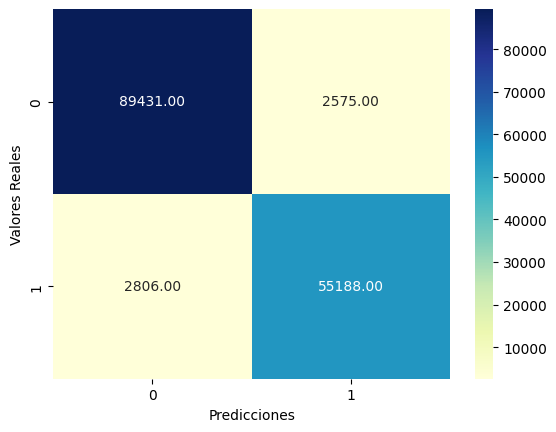

In [10]:
matriz, accuracy, precision, recall, f1 = metricas(y_test, y_pred)

matriz_df = pd.DataFrame(matriz)
sns.heatmap(matriz_df, annot=True, fmt='.2f', cmap='YlGnBu')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

In [11]:
print("Accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("f1:", f1)

Accuracy: 0.9641266666666667
precision: 0.9554212904454409
recall: 0.9516156843811429
f1: 0.9535146902563129


# randomf

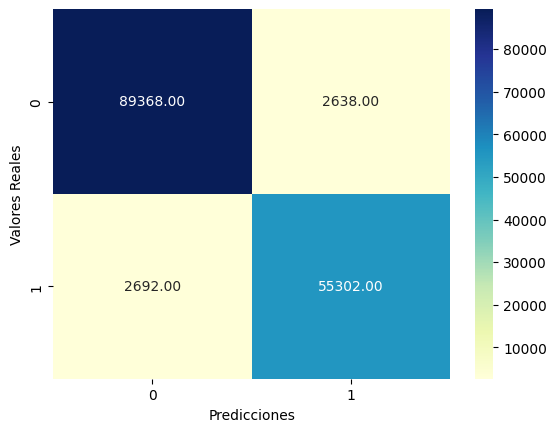

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)
matriz, accuracy, precision, recall, f1 = metricas(y_test, y_pred)

matriz_df = pd.DataFrame(matriz)
sns.heatmap(matriz_df, annot=True, fmt='.2f', cmap='YlGnBu')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

In [13]:
print("Accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("f1:", f1)

Accuracy: 0.9644666666666667
precision: 0.9544701415257163
recall: 0.9535814049729282
f1: 0.9540255662704642


xgboost

In [14]:
from xgboost import XGBClassifier

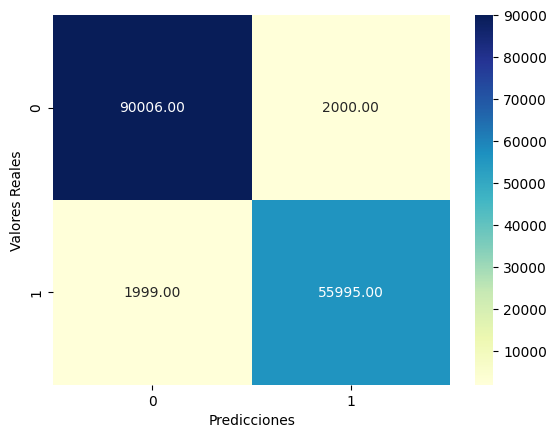

In [15]:
xgb = XGBClassifier().fit(X_train, y_train)
y_pred = xgb.predict(X_test)
matriz, accuracy, precision, recall, f1 = metricas(y_test, y_pred)

matriz_df = pd.DataFrame(matriz)
sns.heatmap(matriz_df, annot=True, fmt='.2f', cmap='YlGnBu')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

In [16]:
print("Accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("f1:", f1)

Accuracy: 0.97334
precision: 0.96551426847142
recall: 0.9655309169914129
f1: 0.9655225926596488


lgbm

In [17]:
from lightgbm import LGBMClassifier

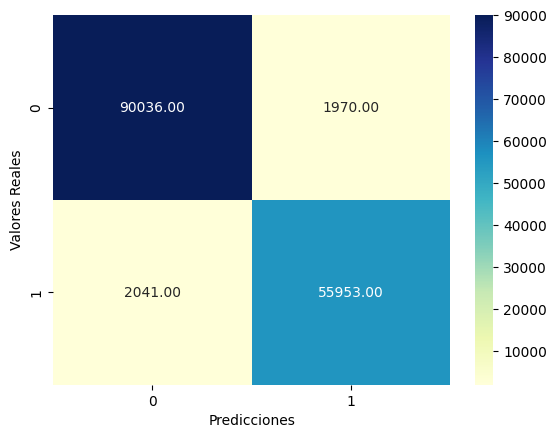

In [18]:
lgbm = LGBMClassifier().fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
matriz, accuracy, precision, recall, f1 = metricas(y_test, y_pred)

matriz_df = pd.DataFrame(matriz)
sns.heatmap(matriz_df, annot=True, fmt='.2f', cmap='YlGnBu')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

In [19]:
print("Accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("f1:", f1)

Accuracy: 0.97326
precision: 0.9659893306631218
recall: 0.9648067041418078
f1: 0.9653976552188204


In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'max_depth': [3, 5]
}

In [25]:
modelo = LGBMClassifier()
grid_model = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5)

In [26]:
grid_model.fit(X_train, y_train)
grid_model.cv_results_
mejor_modelo = grid_model.best_estimator_
y_pred = mejor_modelo.predict(X_test)

In [28]:
mejor_modelo

LGBMClassifier(max_depth=3, n_estimators=200)

In [27]:
matriz, accuracy, precision, recall, f1 = metricas(y_test, y_pred)
print("Accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("f1:", f1)

Accuracy: 0.9734066666666666
precision: 0.9652956076714972
recall: 0.965944752905473
f1: 0.9656200711903263
